In [1]:
def gausKernelDensity(X,width):
    '''
    GAUSKERNELDENSITY Calculate efficiently leave-one-out Gaussian Kernel Density estimate
    Input: 
      X        N x M data matrix
      width    variance of the Gaussian kernel
    
    Output: 
      density        vector of estimated densities
      log_density    vector of estimated log_densities
    '''
    X = np.mat(np.asarray(X))
    N,M = X.shape

    # Calculate squared euclidean distance between data points
    # given by ||x_i-x_j||_F^2=||x_i||_F^2-2x_i^Tx_j+||x_i||_F^2 efficiently
    x2 = np.square(X).sum(axis=1)
    D = x2[:,[0]*N] - 2*X.dot(X.T) + x2[:,[0]*N].T

    # Evaluate densities to each observation
    Q = np.exp(-1/(2.0*width)*D)
    # do not take density generated from the data point itself into account
    Q[np.diag_indices_from(Q)]=0
    sQ = Q.sum(axis=1)
    
    density = 1/((N-1)*np.sqrt(2*np.pi*width)**M+1e-100)*sQ
    log_density = -log(N-1)-M/2*np.log(2*np.pi*width)+np.log(sQ)
    return np.asarray(density), np.asarray(log_density)

In [19]:
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.mixture import GMM

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
rcParams.update({'font.size': 30})
rcParams.update({'figure.autolayout': True})


# def encode_type(x):
#     if x == 'City':
#         return 0
#     elif x == 'Town':
#         return 1
#     else:
#         return 2

    
# def governing_encode(x):
#     if x == 'Conservative':
#         return 0
#     elif x == 'Left-wing':
#         return 1
#     else:
#         return 2

# def municipalityTypeEncoded(x):
#  for index,type_ in enumerate(data.municipalityType.unique()):
#     if x == type_:
#         return index


# data = pd.read_csv("simplified_municipality_indicators.csv")

# data['typeEncoded'] = data['municipalityTypeBroad'].apply(encode_type)

# data['governingEncoded'] = data['governing'].apply(governing_encode)

# data['municipalityTypeEncoded'] = data['municipalityType'].apply(municipalityTypeEncoded)


# city_index = data[data['typeEncoded'] == 0].index.tolist()
# town_index = data[data['typeEncoded'] == 1].index.tolist()
# rural_index = data[data['typeEncoded'] == 2].index.tolist()

# r_t_index = data[data['typeEncoded'] != 0].index.tolist()
# rural_city_index = data[data['typeEncoded'] != 1].index.tolist()
# city_town_index = data[data['typeEncoded'] != 2].index.tolist()


# list_of_variables = ['cars','tractors','snowmobiles','motorcycles' ,'fokusRanking','population',
#                      'hasEducation','urbanDegree','reportedCrime','reportedCrime','rentalApartments',
#                      'youngUnskilled','asylumCosts','reportedCrimeVandalism']

# y_variable = 'typeEncoded'
# temp = data

# temp = temp.reset_index(drop=True)


# town_index = temp[temp['typeEncoded'] == 1].index.tolist()
# rural_index = temp[temp['typeEncoded'] == 2].index.tolist()

# X_to_transform = np.array(temp[list_of_variables])
# X_normalized =  (X_to_transform - X_to_transform.mean()) / (X_to_transform.max() - X_to_transform.min())

# tsne_model = TSNE(n_components=1,random_state=0,perplexity=30,n_iter=200)
# X = tsne_model.fit_transform(X_normalized)

# y = np.matrix(data[y_variable])
full_data = pd.read_csv('2013_merge.csv')
data = pd.read_csv("cleanSet.csv")
data['Cases'].max()

21

# Gaussian kernel density on Cases

Optimal estimated width is: 512.0
Lowest density: [ 0.01171851] for data object: 57
Lowest density: [ 0.01548605] for data object: 198
Lowest density: [ 0.01581831] for data object: 124
Lowest density: [ 0.01688801] for data object: 241
Lowest density: [ 0.01688801] for data object: 281


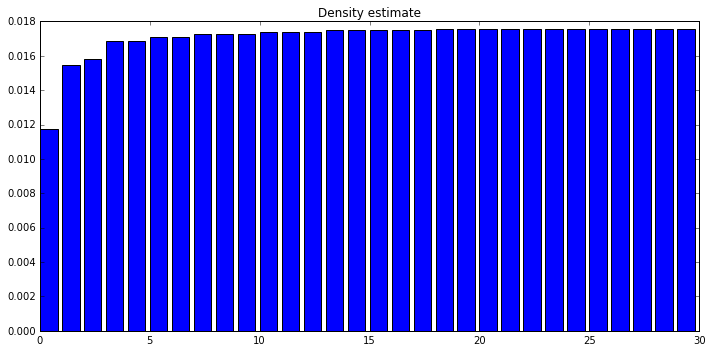

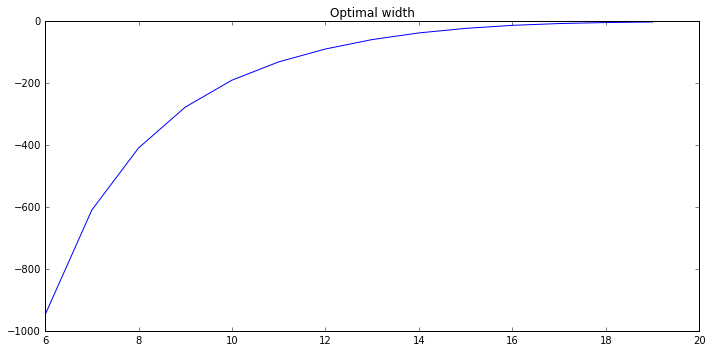

,Municipality,Cases,Population,Year,code,name,medianIncome,youthUnemployment2010,youthUnemployment2013,unemployment2010,...,municipalityTypeBroad,refugees,rentalApartments,governing,fokusRanking,foretagsklimatRanking,cars,motorcycles,tractors,snowmobiles
57,Göteborg,21,533271,2013,1480,Göteborg,202708,7.5,7.2,8.0,...,City,20.1,267.2,Left-wing,6,167,333.856519,16.290029,3.264757,0.459429
198,Stockholm,12,897700,2013,180,Stockholm,234360,3.8,4.2,5.3,...,City,15.9,223.0,Conservative,1,22,359.089896,13.233820,2.625599,1.910438
124,Linköping,11,150202,2013,580,Linköping,203774,7.1,6.1,7.0,...,Town,24.0,253.6,Mixed,12,34,421.918483,25.059586,21.337932,1.071890
241,Uppsala,7,205199,2013,380,Uppsala,209707,4.4,3.7,5.2,...,Town,11.3,162.9,Conservative,4,123,378.179231,19.468906,19.137520,5.165717
281,Örebro,7,140599,2013,1880,Örebro,200347,8.6,8.5,8.6,...,Town,24.5,277.7,Mixed,13,116,445.124076,25.668746,23.086935,3.499314


In [58]:
# exercise 11.3.2

from pylab import *

from toolbox_02450 import gausKernelDensity


data = pd.read_csv("2013_merge.csv")
X = np.matrix(data['Cases']).T
N,M = 290 , 1


# Estimate the optimal kernel density width, by leave-one-out cross-validation
widths = 2.0**np.arange(-10,10)
logP = np.zeros(np.size(widths))
for i,w in enumerate(widths):
    f, log_f = gausKernelDensity(X, w)
    logP[i] = log_f.sum()
val = logP.max()
ind = logP.argmax()

width=widths[ind]
print('Optimal estimated width is: {0}'.format(width))

# Estimate density for each observation not including the observation
# itself in the density estimate
density, log_density = gausKernelDensity(X, width)

# Sort the densities
density_index = (density.argsort(axis=0)).ravel()
density = density[density_index]

# Display the index of the lowest density data object
for index in range(5):
    print('Lowest density: {0} for data object: {1}'.format(density[index],density_index[index]))

# Plot density estimate of outlier score
figure(figsize=(10,5))
bar(range(30),density[:30])
title('Density estimate')
figure(figsize=(10,5))
plot(logP)
title('Optimal width')
show()

full_data.ix[density_index[0:5]]

# Gaussian kernel density on Cases without crossvalidation

The index of the lowest density object: [ 57 198 124 241 281]


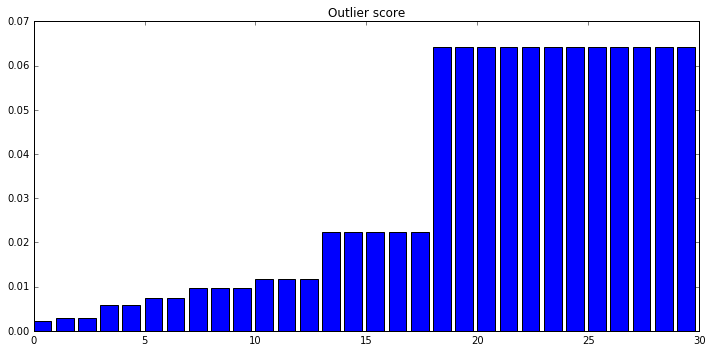

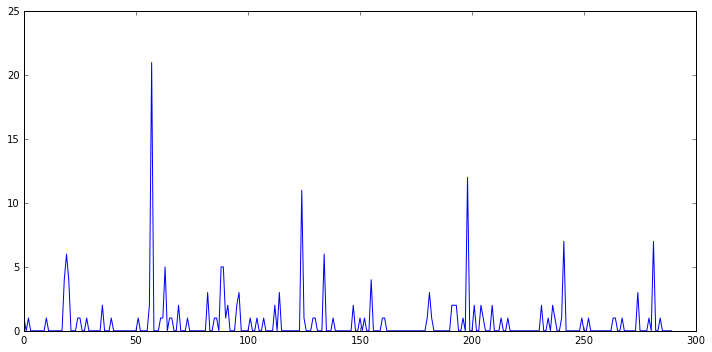

In [32]:
# exercise 11.3.1
# from pylab import *
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20
rcParams.update({'font.size': 30})
rcParams.update({'figure.autolayout': True})
from scipy.stats.kde import gaussian_kde
%matplotlib inline

data = pd.read_csv("2013_merge.csv")
X = np.array(data['Cases'])
N,M = 290 , 1


# Compute kernel density estimate
kde = gaussian_kde(X.ravel())

scores = kde.evaluate(X.ravel())
idx = scores.argsort()
scores.sort()

print('The index of the lowest density object: {0}'.format(idx[0:5]))

# Plot kernel density estimate
figure(figsize=(10,5))
bar(range(30),scores[:30])
title('Outlier score')
show()
figure(figsize=(10,5))

plot(X)

# KNN density on cases

,Municipality,Cases,Population,Year,code,name,medianIncome,youthUnemployment2010,youthUnemployment2013,unemployment2010,...,municipalityTypeBroad,refugees,rentalApartments,governing,fokusRanking,foretagsklimatRanking,cars,motorcycles,tractors,snowmobiles
57,Göteborg,21,533271,2013,1480,Göteborg,202708,7.5,7.2,8.0,...,City,20.1,267.2,Left-wing,6,167,333.856519,16.290029,3.264757,0.459429
198,Stockholm,12,897700,2013,180,Stockholm,234360,3.8,4.2,5.3,...,City,15.9,223.0,Conservative,1,22,359.089896,13.233820,2.625599,1.910438
124,Linköping,11,150202,2013,580,Linköping,203774,7.1,6.1,7.0,...,Town,24.0,253.6,Mixed,12,34,421.918483,25.059586,21.337932,1.071890
241,Uppsala,7,205199,2013,380,Uppsala,209707,4.4,3.7,5.2,...,Town,11.3,162.9,Conservative,4,123,378.179231,19.468906,19.137520,5.165717
281,Örebro,7,140599,2013,1880,Örebro,200347,8.6,8.5,8.6,...,Town,24.5,277.7,Mixed,13,116,445.124076,25.668746,23.086935,3.499314


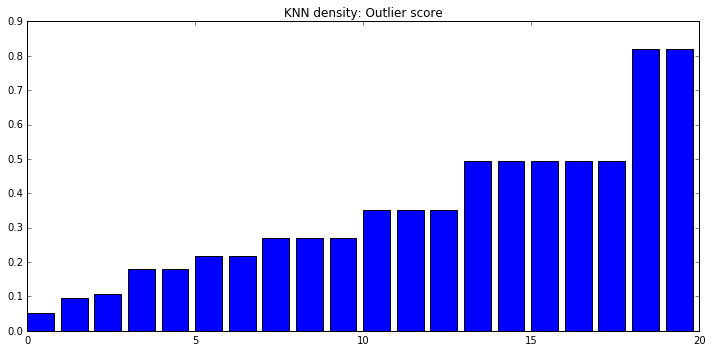

In [61]:
### K-neighbors density estimator
# Neighbor to use:
from sklearn.neighbors import NearestNeighbors

data = pd.read_csv("2013_merge.csv")
X = np.matrix(data['Cases']).T
N,M = 290 , 1

# if the k is set to low alot will be come inf
K = 100

# Find the k nearest neighbors
knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(X)

density = 1./(D.sum(axis=1)/K)

# Sort the scores
density_index = density.argsort()
density = density[density_index]

# Plot k-neighbor estimate of outlier score (distances)
figure(figsize=(10,5))
bar(range(20),density[:20])
title('KNN density: Outlier score')

data.ix[density_index[0:5]]

In [62]:
density

array([ 0.05221932,  0.09680542,  0.10672359,  0.18050542,  0.18050542,
        0.21645022,  0.21645022,  0.26954178,  0.26954178,  0.26954178,
        0.35087719,  0.35087719,  0.35087719,  0.49261084,  0.49261084,
        0.49261084,  0.49261084,  0.49261084,  0.81967213,  0.81967213,
        0.81967213,  0.81967213,  0.81967213,  0.81967213,  0.81967213,
        0.81967213,  0.81967213,  0.81967213,  0.81967213,  0.81967213,
        0.81967213,  0.81967213,  0.81967213,  1.75438596,  1.75438596,
        1.75438596,  1.75438596,  1.75438596,  1.75438596,  1.75438596,
        1.75438596,  1.75438596,  1.75438596,  1.75438596,  1.75438596,
        1.75438596,  1.75438596,  1.75438596,  1.75438596,  1.75438596,
        1.75438596,  1.75438596,  1.75438596,  1.75438596,  1.75438596,
        1.75438596,  1.75438596,  1.75438596,  1.75438596,  1.75438596,
        1.75438596,  1.75438596,  1.75438596,  1.75438596,  1.75438596,
        1.75438596,  1.75438596,  1.75438596,  1.75438596,  1.75

# KNN average relative density on Cases

,Municipality,Cases,Population,Year,code,name,medianIncome,youthUnemployment2010,youthUnemployment2013,unemployment2010,...,municipalityTypeBroad,refugees,rentalApartments,governing,fokusRanking,foretagsklimatRanking,cars,motorcycles,tractors,snowmobiles
57,Göteborg,21,533271,2013,1480,Göteborg,202708,7.5,7.2,8.0,...,City,20.10,267.2,Left-wing,6,167,333.856519,16.290029,3.264757,0.459429
198,Stockholm,12,897700,2013,180,Stockholm,234360,3.8,4.2,5.3,...,City,15.90,223.0,Conservative,1,22,359.089896,13.233820,2.625599,1.910438
124,Linköping,11,150202,2013,580,Linköping,203774,7.1,6.1,7.0,...,Town,24.00,253.6,Mixed,12,34,421.918483,25.059586,21.337932,1.071890
241,Uppsala,7,205199,2013,380,Uppsala,209707,4.4,3.7,5.2,...,Town,11.30,162.9,Conservative,4,123,378.179231,19.468906,19.137520,5.165717
281,Örebro,7,140599,2013,1880,Örebro,200347,8.6,8.5,8.6,...,Town,24.50,277.7,Mixed,13,116,445.124076,25.668746,23.086935,3.499314
134,Malmö,6,312994,2013,1280,Malmö,178772,8.8,10.2,8.8,...,City,25.30,212.0,Left-wing,25,91,357.847115,13.211116,3.952152,0.182112
19,Borås,6,105995,2013,1490,Borås,200005,8.0,7.9,7.8,...,Town,21.00,211.3,Mixed,31,36,463.767159,29.897637,18.680126,0.934006
88,Järfälla,5,69167,2013,123,Järfälla,227460,3.8,5.0,5.6,...,City,18.70,110.8,Conservative,10,59,379.805399,19.517978,2.515651,3.021672
63,Halmstad,5,94084,2013,1380,Halmstad,203764,7.9,9.2,7.3,...,Town,7.53,213.5,Conservative,22,93,486.692743,32.598529,22.883806,0.531440
89,Jönköping,5,130798,2013,680,Jönköping,207039,6.9,7.5,6.0,...,Town,15.90,194.3,Conservative,22,50,470.519427,28.050888,26.116607,0.993899


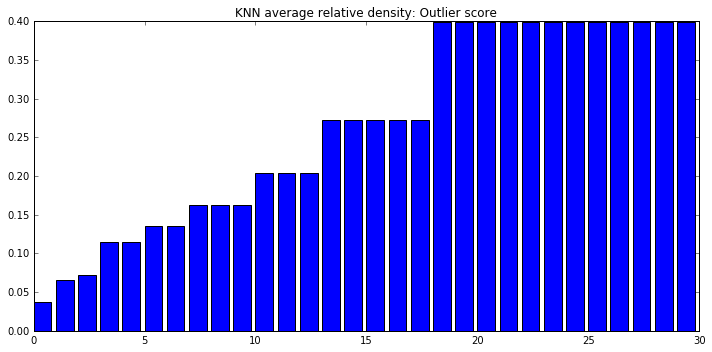

In [37]:

data = pd.read_csv("2013_merge.csv")
X = np.matrix(data['Cases'],dtype='float32').T
X =  (X - X.mean()) / (X.max() - X.min())

N,M = 290 , 1

K = 290

knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(X)
density = 1./(D.sum(axis=1)/K)
avg_rel_density = density/(density[i[:,1:]].sum(axis=1)/K)

# Sort the avg.rel.densities
i_avg_rel = avg_rel_density.argsort()
avg_rel_density = avg_rel_density[i_avg_rel]

# Plot k-neighbor estimate of outlier score (distances)
figure(figsize=(10,5))
bar(range(30),avg_rel_density[:30])
title('KNN average relative density: Outlier score')


data.ix[i_avg_rel[0:10]]


# Gaussian kernel density on more variables 

Optimal estimated width is: 0.000179902048221
[198  57 134 241 124]
('density', array([  1.76808191e-181]))
('density', array([  3.09027284e-55]))
('density', array([ 5.77593923]))
('density', array([  4.57650876e+13]))
('density', array([  3.80442026e+18]))


,Municipality,Cases,Population,Year,code,name,medianIncome,youthUnemployment2010,youthUnemployment2013,unemployment2010,...,municipalityTypeBroad,refugees,rentalApartments,governing,fokusRanking,foretagsklimatRanking,cars,motorcycles,tractors,snowmobiles
198,Stockholm,12,897700,2013,180,Stockholm,234360,3.8,4.2,5.3,...,City,15.9,223.0,Conservative,1,22,359.089896,13.233820,2.625599,1.910438
57,Göteborg,21,533271,2013,1480,Göteborg,202708,7.5,7.2,8.0,...,City,20.1,267.2,Left-wing,6,167,333.856519,16.290029,3.264757,0.459429
134,Malmö,6,312994,2013,1280,Malmö,178772,8.8,10.2,8.8,...,City,25.3,212.0,Left-wing,25,91,357.847115,13.211116,3.952152,0.182112
241,Uppsala,7,205199,2013,380,Uppsala,209707,4.4,3.7,5.2,...,Town,11.3,162.9,Conservative,4,123,378.179231,19.468906,19.137520,5.165717
124,Linköping,11,150202,2013,580,Linköping,203774,7.1,6.1,7.0,...,Town,24.0,253.6,Mixed,12,34,421.918483,25.059586,21.337932,1.071890
262,Västervik,0,35867,2013,883,Västervik,209520,13.2,13.5,9.3,...,Rural,15.7,172.2,Mixed,159,169,127.509129,9.702317,12.903589,0.802077
281,Örebro,7,140599,2013,1880,Örebro,200347,8.6,8.5,8.6,...,Town,24.5,277.7,Mixed,13,116,445.124076,25.668746,23.086935,3.499314
89,Jönköping,5,130798,2013,680,Jönköping,207039,6.9,7.5,6.0,...,Town,15.9,194.3,Conservative,22,50,470.519427,28.050888,26.116607,0.993899
155,Norrköping,4,133749,2013,581,Norrköping,195771,9.2,11.8,9.5,...,Town,30.7,234.9,Left-wing,34,189,432.287344,28.007686,19.117900,1.181317
69,Helsingborg,2,132989,2013,1283,Helsingborg,198973,9.6,9.1,8.7,...,Town,15.7,211.9,Conservative,18,23,435.254044,24.603539,9.700050,0.263180


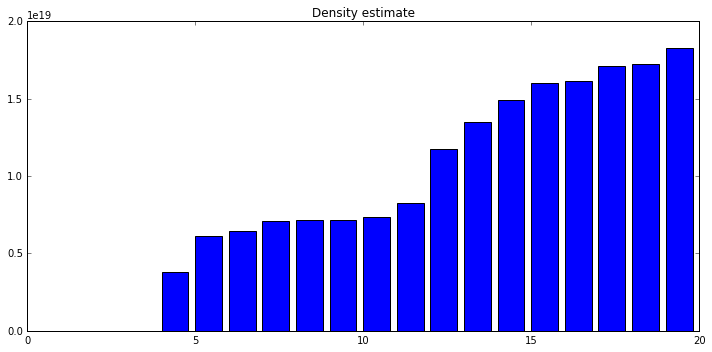

In [38]:

list_of_variables = ['cars','tractors','snowmobiles','motorcycles' ,'fokusRanking','population',
                     'hasEducation','urbanDegree','reportedCrime','reportedCrime','rentalApartments',
                     'youngUnskilled','asylumCosts','reportedCrimeVandalism']


data = pd.read_csv("2013_merge.csv")


X = np.matrix(data[list_of_variables])
X =  (X - X.mean()) / (X.max() - X.min())

N,M = 290 , 14

widths = X.var(axis=0).max() * (2.0**np.arange(-10,3))
logP = np.zeros(np.size(widths))
for i,w in enumerate(widths):
   density, log_density = gausKernelDensity(X,w)
   logP[i] = log_density.sum()
val = logP.max()
ind = logP.argmax()

width=widths[ind]
print('Optimal estimated width is: {0}'.format(width))

# evaluate density for estimated width
density, log_density = gausKernelDensity(X,width)

# Sort the densities
density_more_variables = (density.argsort(axis=0)).ravel()
density = density[density_more_variables]

# Plot density estimate of outlier score
figure(figsize=(10,5))
bar(range(20),density[:20])
title('Density estimate')

print(density_more_variables[0:5])
for den in range(5):
    print("density" , density[den])
    

data.ix[density_more_variables[0:10]]

# KNN density on more variables

[198  57 134 241 124 238 131 276 262  19]


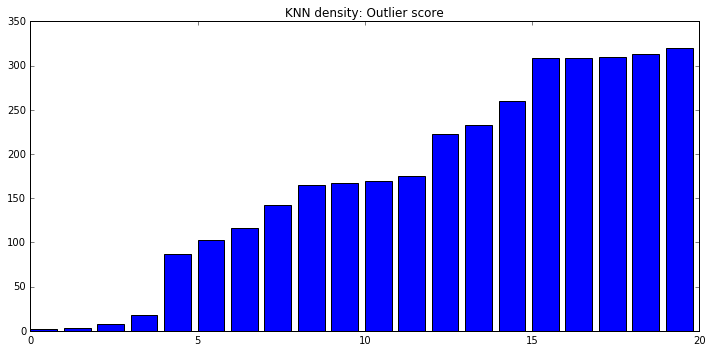

In [39]:
# KNN Density estimater
# exercise 11.3.2

# from pylab import *
from toolbox_02450 import gausKernelDensity


list_of_variables = ['cars','tractors','snowmobiles','motorcycles' ,'fokusRanking','population',
                     'hasEducation','urbanDegree','reportedCrime','reportedCrime','rentalApartments',
                     'youngUnskilled','asylumCosts','reportedCrimeVandalism']


data = pd.read_csv("2013_merge.csv")


X = np.matrix(data[list_of_variables])
X =  (X - X.mean()) / (X.max() - X.min())

N,M = 290 , 14

### K-neighbors density estimator
# Neighbor to use:
K = 5

# Find the k nearest neighbors
knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(X)

density = 1./(D.sum(axis=1)/K)

# Sort the scores
density_more_variables = density.argsort()
density = density[density_more_variables]

# Plot k-neighbor estimate of outlier score (distances)
figure(figsize=(10,5))

bar(range(20),density[:20])
title('KNN density: Outlier score')
print(density_more_variables[0:10])

# data.ix[density_more_variables[0:10]]

c = data.ix[density_more_variables[0:10]]['code']

# KNN average relative density

0.701140405181
[198  57 134 241 124]
[ 0.01732221  0.03058035  0.05537029  0.09283882  0.1423068 ]


,Municipality,Cases,Population,Year,code,name,medianIncome,youthUnemployment2010,youthUnemployment2013,unemployment2010,...,municipalityTypeBroad,refugees,rentalApartments,governing,fokusRanking,foretagsklimatRanking,cars,motorcycles,tractors,snowmobiles
198,Stockholm,12,897700,2013,180,Stockholm,234360,3.8,4.2,5.3,...,City,15.9,223.0,Conservative,1,22,359.089896,13.233820,2.625599,1.910438
57,Göteborg,21,533271,2013,1480,Göteborg,202708,7.5,7.2,8.0,...,City,20.1,267.2,Left-wing,6,167,333.856519,16.290029,3.264757,0.459429
134,Malmö,6,312994,2013,1280,Malmö,178772,8.8,10.2,8.8,...,City,25.3,212.0,Left-wing,25,91,357.847115,13.211116,3.952152,0.182112
241,Uppsala,7,205199,2013,380,Uppsala,209707,4.4,3.7,5.2,...,Town,11.3,162.9,Conservative,4,123,378.179231,19.468906,19.137520,5.165717
124,Linköping,11,150202,2013,580,Linköping,203774,7.1,6.1,7.0,...,Town,24.0,253.6,Mixed,12,34,421.918483,25.059586,21.337932,1.071890
262,Västervik,0,35867,2013,883,Västervik,209520,13.2,13.5,9.3,...,Rural,15.7,172.2,Mixed,159,169,127.509129,9.702317,12.903589,0.802077
281,Örebro,7,140599,2013,1880,Örebro,200347,8.6,8.5,8.6,...,Town,24.5,277.7,Mixed,13,116,445.124076,25.668746,23.086935,3.499314
155,Norrköping,4,133749,2013,581,Norrköping,195771,9.2,11.8,9.5,...,Town,30.7,234.9,Left-wing,34,189,432.287344,28.007686,19.117900,1.181317
69,Helsingborg,2,132989,2013,1283,Helsingborg,198973,9.6,9.1,8.7,...,Town,15.7,211.9,Conservative,18,23,435.254044,24.603539,9.700050,0.263180
89,Jönköping,5,130798,2013,680,Jönköping,207039,6.9,7.5,6.0,...,Town,15.9,194.3,Conservative,22,50,470.519427,28.050888,26.116607,0.993899


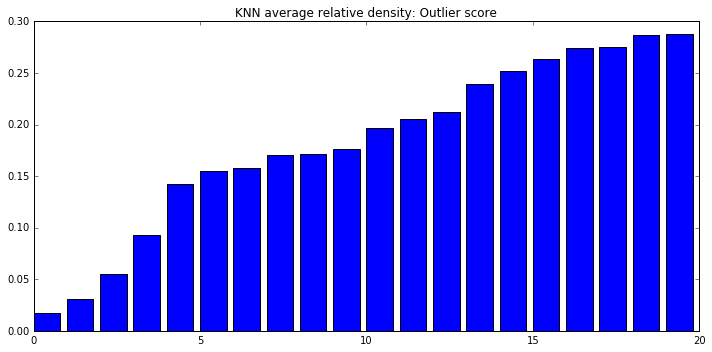

In [40]:

# from pylab import *
from toolbox_02450 import gausKernelDensity


list_of_variables = ['cars','tractors','snowmobiles','motorcycles' ,'fokusRanking','population',
                     'hasEducation','urbanDegree','reportedCrime','reportedCrime','rentalApartments',
                     'youngUnskilled','asylumCosts','reportedCrimeVandalism']


data = pd.read_csv("2013_merge.csv")


X = np.matrix(data[list_of_variables])
X =  (X - X.mean()) / (X.max() - X.min())

N,M = 290 , 14

K = 100

knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(X)
density = 1./(D.sum(axis=1)/K)
avg_rel_density = density/(density[i[:,1:]].sum(axis=1)/K)

print(avg_rel_density[141])
# Sort the avg.rel.densities
i_avg_rel = avg_rel_density.argsort()
avg_rel_density = avg_rel_density[i_avg_rel]

# Plot k-neighbor estimate of outlier score (distances)
figure(figsize=(10,5))

bar(range(20),avg_rel_density[:20])
title('KNN average relative density: Outlier score')

print(i_avg_rel[0:5])
print(avg_rel_density[0:5])
data.ix[i_avg_rel[0:10]]


# What is wrong with Österråker and Älvdalen: Turns out nothing is!


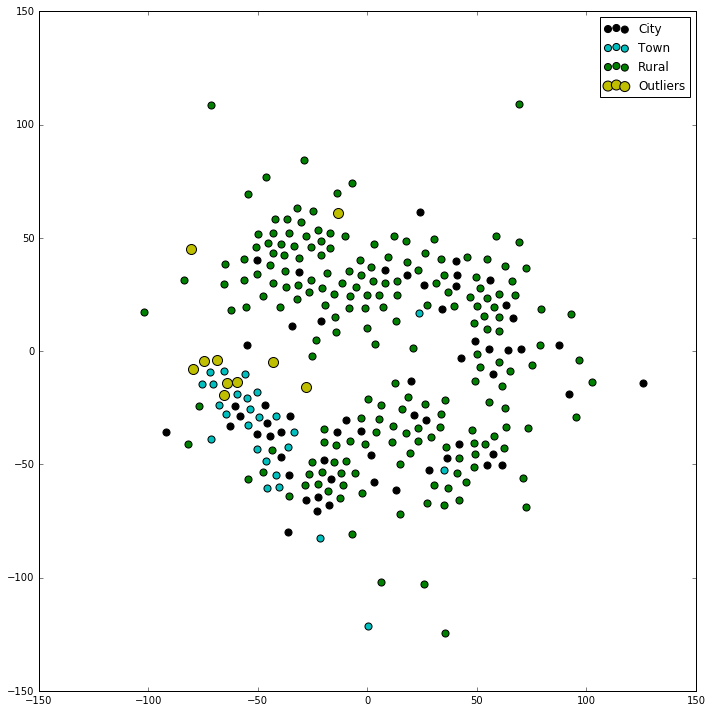

In [42]:

def encode_type(x):
    if x == 'City':
        return 0
    elif x == 'Town':
        return 1
    else:
        return 2

    
def governing_encode(x):
    if x == 'Conservative':
        return 0
    elif x == 'Left-wing':
        return 1
    else:
        return 2

def municipalityTypeEncoded(x):
 for index,type_ in enumerate(data.municipalityType.unique()):
    if x == type_:
        return index


data = pd.read_csv("simplified_municipality_indicators.csv")

data['typeEncoded'] = data['municipalityTypeBroad'].apply(encode_type)

data['governingEncoded'] = data['governing'].apply(governing_encode)

data['municipalityTypeEncoded'] = data['municipalityType'].apply(municipalityTypeEncoded)


city_index = data[data['typeEncoded'] == 0].index.tolist()
town_index = data[data['typeEncoded'] == 1].index.tolist()
rural_index = data[data['typeEncoded'] == 2].index.tolist()

r_t_index = data[data['typeEncoded'] != 0].index.tolist()
rural_city_index = data[data['typeEncoded'] != 1].index.tolist()
city_town_index = data[data['typeEncoded'] != 2].index.tolist()

list_of_variables = ['cars','tractors','snowmobiles','motorcycles' ,'fokusRanking','population',
                     'hasEducation','urbanDegree','reportedCrime','reportedCrime','rentalApartments',
                     'youngUnskilled','asylumCosts','reportedCrimeVandalism']
                     
y_variable = 'typeEncoded'
    
X_to_transform = np.array(data[list_of_variables])
X_normalized =  (X_to_transform - X_to_transform.mean()) / (X_to_transform.max() - X_to_transform.min())

tsne_model = TSNE(n_components=2,random_state=0,perplexity=30,n_iter=200)
X_reduced_with_TSNE = tsne_model.fit_transform(X_normalized)

colors = np.array(data[y_variable])


figure(figsize=(10,10))

plt.scatter(X_reduced_with_TSNE[city_index,0],X_reduced_with_TSNE[city_index,1],c='k', s=50,label=colors)
plt.scatter(X_reduced_with_TSNE[town_index,0],X_reduced_with_TSNE[town_index,1],c='c', s=50,label=colors)
plt.scatter(X_reduced_with_TSNE[rural_index,0],X_reduced_with_TSNE[rural_index,1],c='g', s=50,label=colors)

# plt.scatter(X_reduced_with_TSNE[285,0],X_reduced_with_TSNE[285,1],c='b', s=100,label=colors)
# plt.scatter(X_reduced_with_TSNE[278,0],X_reduced_with_TSNE[278,1],c='b', s=100,label=colors)
# plt.scatter(X_reduced_with_TSNE[275,0],X_reduced_with_TSNE[275,1],c='b', s=100,label=colors)

#Plotting outliers

outlier_index = data[data['code'].isin(c)].index.tolist()
plt.scatter(X_reduced_with_TSNE[outlier_index,0],X_reduced_with_TSNE[outlier_index,1],c='y', s=100,label=colors)


plt.legend(['City', 'Town', 'Rural','Outliers'])
# plt.savefig("Scatterplot_muni_type")
plt.show()
# print(data.ix[157])
# print(data.ix[285])
# print(data.ix[278])





Optimal estimated width is: 254.849007429


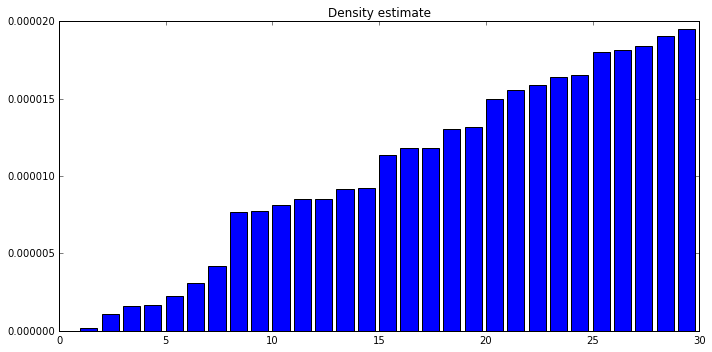

[ 58  72 157 122 262]
('density', array([  5.05677034e-09]))
('density', array([  1.76544856e-07]))
('density', array([  1.07906710e-06]))
('density', array([  1.61214677e-06]))
('density', array([  1.68230641e-06]))


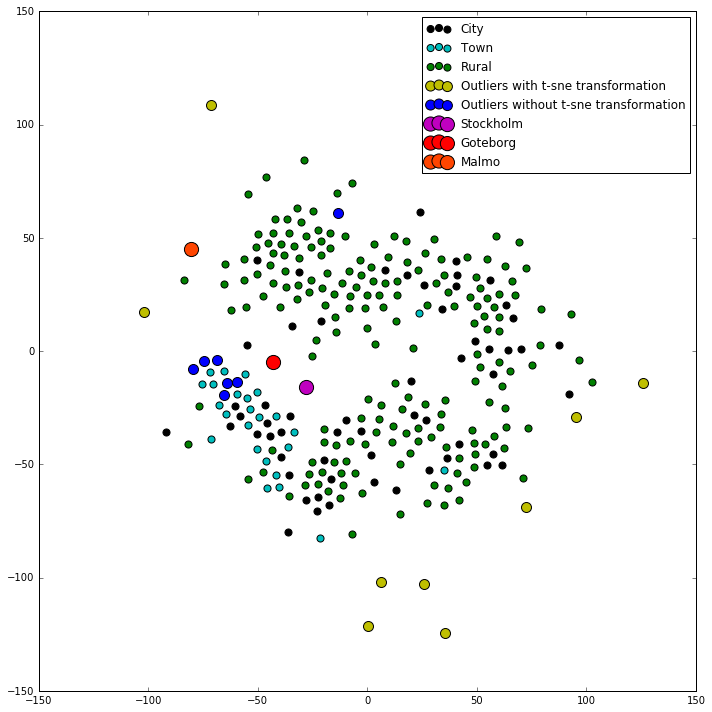

,code,name,medianIncome,youthUnemployment2010,youthUnemployment2013,unemployment2010,unemployment2013,unemploymentChange,reportedCrime,populationChange,...,governing,fokusRanking,foretagsklimatRanking,cars,motorcycles,tractors,snowmobiles,typeEncoded,governingEncoded,municipalityTypeEncoded
58,884,Vimmerby,192042,10.6,10.8,8.2,7.2,-1.0,556,-1.7,...,Conservative,192,166,571.596782,54.032838,101.785831,1.766207,2,0,5
72,1498,Tidaholm,190956,11.6,8.9,9.4,6.8,-2.6,1289,-1.0,...,Left-wing,205,168,550.099483,52.049343,92.160764,0.875448,2,1,5
157,586,Mjölby,199966,13.3,10.7,9.3,7.2,-2.1,657,2.6,...,Mixed,103,96,535.400752,37.091932,52.825600,1.140121,2,2,7
122,2284,Örnsköldsvik,198264,13.9,12.0,10.3,8.7,-1.6,593,-0.7,...,Left-wing,127,126,557.560106,33.353945,63.852617,103.117157,1,1,0
262,139,Upplands-Bro,222258,5.7,5.8,5.9,6.2,0.3,1048,8.9,...,Conservative,88,31,404.120957,25.664899,9.998786,4.290977,0,0,8
162,683,Värnamo,186539,10.9,9.3,7.9,6.5,-1.4,1015,-1.3,...,Conservative,79,44,495.748181,32.258065,51.523685,0.724900,2,0,5
186,2182,Söderhamn,180575,16.5,13.3,12.6,10.4,-2.2,1211,-2.1,...,Mixed,244,198,548.188036,35.217357,40.759374,42.056442,2,2,6
165,1492,Åmål,208448,14.0,15.4,11.9,10.3,-1.6,476,2.3,...,Mixed,226,261,400.279206,26.270702,49.432071,1.269116,2,2,7
106,686,Eksjö,197233,7.8,10.6,5.1,6.6,1.5,1039,0.9,...,Mixed,113,53,512.512148,43.124393,74.829932,1.214772,2,2,7
38,821,Högsby,168358,9.8,10.4,8.0,7.9,-0.1,839,-3.6,...,Mixed,282,262,555.089192,36.726128,114.900315,3.147954,2,2,1


In [57]:

def encode_type(x):
    if x == 'City':
        return 0
    elif x == 'Town':
        return 1
    else:
        return 2

    
def governing_encode(x):
    if x == 'Conservative':
        return 0
    elif x == 'Left-wing':
        return 1
    else:
        return 2

def municipalityTypeEncoded(x):
 for index,type_ in enumerate(data.municipalityType.unique()):
    if x == type_:
        return index


data = pd.read_csv("simplified_municipality_indicators.csv")

data['typeEncoded'] = data['municipalityTypeBroad'].apply(encode_type)

data['governingEncoded'] = data['governing'].apply(governing_encode)

data['municipalityTypeEncoded'] = data['municipalityType'].apply(municipalityTypeEncoded)


city_index = data[data['typeEncoded'] == 0].index.tolist()
town_index = data[data['typeEncoded'] == 1].index.tolist()
rural_index = data[data['typeEncoded'] == 2].index.tolist()

r_t_index = data[data['typeEncoded'] != 0].index.tolist()
rural_city_index = data[data['typeEncoded'] != 1].index.tolist()
city_town_index = data[data['typeEncoded'] != 2].index.tolist()

list_of_variables = ['cars','tractors','snowmobiles','motorcycles' ,'fokusRanking','population',
                     'hasEducation','urbanDegree','reportedCrime','reportedCrime','rentalApartments',
                     'youngUnskilled','asylumCosts','reportedCrimeVandalism']
                     
y_variable = 'typeEncoded'
    
X_to_transform = np.array(data[list_of_variables])
X_normalized =  (X_to_transform - X_to_transform.mean()) / (X_to_transform.max() - X_to_transform.min())

tsne_model = TSNE(n_components=2,random_state=0,perplexity=30,n_iter=200)
X_reduced_with_TSNE = tsne_model.fit_transform(X_normalized)

colors = np.array(data[y_variable])




X =  X_reduced_with_TSNE

N,M = 290 , 14

widths = X.var(axis=0).max() * (2.0**np.arange(-10,3))
logP = np.zeros(np.size(widths))
for i,w in enumerate(widths):
   density, log_density = gausKernelDensity(X,w)
   logP[i] = log_density.sum()
val = logP.max()
ind = logP.argmax()

width=widths[ind]
print('Optimal estimated width is: {0}'.format(width))

# evaluate density for estimated width
density, log_density = gausKernelDensity(X,width)

# Sort the densities
density_more_variables = (density.argsort(axis=0)).ravel()
density = density[density_more_variables]

# Plot density estimate of outlier score

figure(figsize=(10,5))
bar(range(30),density[:30])
title('Density estimate')
plt.show()
print(density_more_variables[0:5])
for den in range(5):
    print("density" , density[den])
    


figure(figsize=(10,10))
plt.scatter(X_reduced_with_TSNE[city_index,0],X_reduced_with_TSNE[city_index,1],c='k', s=50,label=colors)
plt.scatter(X_reduced_with_TSNE[town_index,0],X_reduced_with_TSNE[town_index,1],c='c', s=50,label=colors)
plt.scatter(X_reduced_with_TSNE[rural_index,0],X_reduced_with_TSNE[rural_index,1],c='g', s=50,label=colors)

#Plotting outliers
plt.scatter(X_reduced_with_TSNE[density_more_variables[:10],0],
            X_reduced_with_TSNE[density_more_variables[:10],1],c='y', s=100,label=colors)


# plt.scatter(X_reduced_with_TSNE[198,0],X_reduced_with_TSNE[198,1],c='b', s=100,label=colors)
# plt.scatter(X_reduced_with_TSNE[57,0],X_reduced_with_TSNE[57,1],c='b', s=100,label=colors)
# plt.scatter(X_reduced_with_TSNE[134,0],X_reduced_with_TSNE[134,1],c='b', s=100,label=colors)
# plt.scatter(X_reduced_with_TSNE[199,0],X_reduced_with_TSNE[199,1],c='y', s=100,label=colors)

outlier_index = data[data['code'].isin(c)].index.tolist()
plt.scatter(X_reduced_with_TSNE[outlier_index,0],X_reduced_with_TSNE[outlier_index,1],c='b', s=100,label=colors)
stockholm = data[data['code'] == 180].index
plt.scatter(X_reduced_with_TSNE[stockholm,0],X_reduced_with_TSNE[stockholm,1],c='m', s=200,label=colors)
goteborg = data[data['code'] == 1480].index
plt.scatter(X_reduced_with_TSNE[goteborg,0],X_reduced_with_TSNE[goteborg,1],c='r', s=200,label=colors)
malmo = data[data['code'] == 1280].index
plt.scatter(X_reduced_with_TSNE[malmo,0],X_reduced_with_TSNE[malmo,1],c='#FF4500', s=200,label=colors)


# 198  57 134

plt.legend(['City', 'Town', 'Rural',
            'Outliers with t-sne transformation',
            'Outliers without t-sne transformation',
           'Stockholm','Goteborg','Malmo'])
# plt.savefig("Scatterplot_muni_type")
plt.show()
# print(data.ix[198])
# print(data.ix[57])
# print(data.ix[134])
data.ix[density_more_variables[:10]]






Optimal estimated width is: 623.076361655


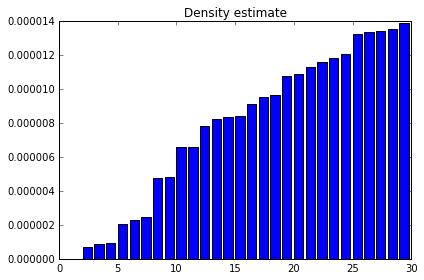

[199  76  84 128  36]
('density', array([  3.11171391e-11]))
('density', array([  5.49328069e-09]))
('density', array([  6.81071935e-07]))
('density', array([  8.95593438e-07]))
('density', array([  9.51490435e-07]))


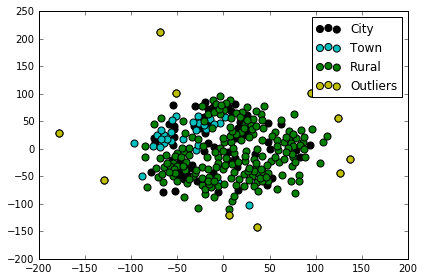

,Municipality,Cases,Population,Year,code,name,medianIncome,youthUnemployment2010,youthUnemployment2013,unemployment2010,...,governing,fokusRanking,foretagsklimatRanking,cars,motorcycles,tractors,snowmobiles,typeEncoded,governingEncoded,municipalityTypeEncoded
199,Storfors,0,4131,2013,1760,Storfors,181928,21.8,15.0,14.6,...,Left-wing,288,136,580.973130,43.572985,72.137497,14.524328,2,1,1
76,Hylte,0,10001,2013,1315,Hylte,198302,7.5,8.4,6.2,...,Mixed,175,117,548.345165,44.995500,103.189681,1.599840,2,2,2
84,Högsby,0,5718,2013,821,Högsby,168358,9.8,10.4,8.0,...,Mixed,282,262,555.089192,36.726128,114.900315,3.147954,2,2,1
128,Lomma,0,22496,2013,1262,Lomma,261094,3.4,2.9,3.3,...,Conservative,56,47,499.866643,30.538762,11.824324,0.711238,0,0,0
36,Eslöv,0,31920,2013,1285,Eslöv,203186,7.7,9.8,6.4,...,Mixed,58,156,497.399749,40.288221,48.778195,0.375940,0,2,5
161,Nynäshamn,1,26796,2013,192,Nynäshamn,209115,5.1,6.8,5.5,...,Mixed,86,243,419.428273,35.303777,19.070010,3.694581,0,2,0
210,Svenljunga,0,10299,2013,1465,Svenljunga,191773,9.0,7.2,6.5,...,Conservative,228,214,573.065346,48.257112,104.087776,1.456452,2,0,6
99,Kinda,0,9802,2013,513,Kinda,192820,12.8,12.0,6.9,...,Conservative,198,120,569.475617,46.317078,110.793716,3.876760,2,0,6
212,Säter,0,10873,2013,2082,Säter,200005,6.0,6.4,5.6,...,Mixed,195,100,598.178975,47.916858,91.235170,40.007358,2,2,1
89,Jönköping,5,130798,2013,680,Jönköping,207039,6.9,7.5,6.0,...,Conservative,22,50,470.519427,28.050888,26.116607,0.993899,1,0,7


In [12]:

def encode_type(x):
    if x == 'City':
        return 0
    elif x == 'Town':
        return 1
    else:
        return 2

    
def governing_encode(x):
    if x == 'Conservative':
        return 0
    elif x == 'Left-wing':
        return 1
    else:
        return 2

def municipalityTypeEncoded(x):
 for index,type_ in enumerate(data.municipalityType.unique()):
    if x == type_:
        return index


data = pd.read_csv("2013_merge.csv")

data['typeEncoded'] = data['municipalityTypeBroad'].apply(encode_type)

data['governingEncoded'] = data['governing'].apply(governing_encode)

data['municipalityTypeEncoded'] = data['municipalityType'].apply(municipalityTypeEncoded)


city_index = data[data['typeEncoded'] == 0].index.tolist()
town_index = data[data['typeEncoded'] == 1].index.tolist()
rural_index = data[data['typeEncoded'] == 2].index.tolist()

r_t_index = data[data['typeEncoded'] != 0].index.tolist()
rural_city_index = data[data['typeEncoded'] != 1].index.tolist()
city_town_index = data[data['typeEncoded'] != 2].index.tolist()

list_of_variables = ['cars','tractors','snowmobiles','motorcycles' ,'fokusRanking','population',
                     'hasEducation','urbanDegree','reportedCrime','reportedCrime','rentalApartments',
                     'youngUnskilled','asylumCosts','reportedCrimeVandalism']
                     
y_variable = 'typeEncoded'
    
X_to_transform = np.array(data[list_of_variables])
X_normalized =  (X_to_transform - X_to_transform.mean()) / (X_to_transform.max() - X_to_transform.min())

tsne_model = TSNE(n_components=2,random_state=0,perplexity=30,n_iter=200)
X_reduced_with_TSNE = tsne_model.fit_transform(X_normalized)

colors = np.array(data[y_variable])


X =  X_reduced_with_TSNE

N,M = 290 , 14

widths = X.var(axis=0).max() * (2.0**np.arange(-10,3))
logP = np.zeros(np.size(widths))
for i,w in enumerate(widths):
   density, log_density = gausKernelDensity(X,w)
   logP[i] = log_density.sum()
val = logP.max()
ind = logP.argmax()

width=widths[ind]
print('Optimal estimated width is: {0}'.format(width))

# evaluate density for estimated width
density, log_density = gausKernelDensity(X,width)

# Sort the densities
density_more_variables = (density.argsort(axis=0)).ravel()
density = density[density_more_variables]

# Plot density estimate of outlier score
figure(1)
bar(range(30),density[:30])
title('Density estimate')
plt.show()
print(density_more_variables[0:5])
for den in range(5):
    print("density" , density[den])
    


plt.scatter(X_reduced_with_TSNE[city_index,0],X_reduced_with_TSNE[city_index,1],c='k', s=50,label=colors)
plt.scatter(X_reduced_with_TSNE[town_index,0],X_reduced_with_TSNE[town_index,1],c='c', s=50,label=colors)
plt.scatter(X_reduced_with_TSNE[rural_index,0],X_reduced_with_TSNE[rural_index,1],c='g', s=50,label=colors)

#Plotting outliers
plt.scatter(X_reduced_with_TSNE[density_more_variables[:10],0],X_reduced_with_TSNE[density_more_variables[:10],1],c='y', s=50,label=colors)


# plt.scatter(X_reduced_with_TSNE[198,0],X_reduced_with_TSNE[198,1],c='b', s=100,label=colors)
# plt.scatter(X_reduced_with_TSNE[57,0],X_reduced_with_TSNE[57,1],c='b', s=100,label=colors)
# plt.scatter(X_reduced_with_TSNE[134,0],X_reduced_with_TSNE[134,1],c='b', s=100,label=colors)
# plt.scatter(X_reduced_with_TSNE[199,0],X_reduced_with_TSNE[199,1],c='y', s=100,label=colors)

# 198  57 134

plt.legend(['City', 'Town', 'Rural','Outliers'])
# plt.savefig("Scatterplot_muni_type")
plt.show()
# print(data.ix[198])
# print(data.ix[57])
# print(data.ix[134])
data.ix[density_more_variables[:10]]



In [13]:
b =  pd.read_csv("2013_merge.csv")

In [14]:
a = pd.read_csv('simplified_municipality_indicators.csv')

In [15]:
b[b['name'] == 'Stockholm']

,Municipality,Cases,Population,Year,code,name,medianIncome,youthUnemployment2010,youthUnemployment2013,unemployment2010,...,municipalityTypeBroad,refugees,rentalApartments,governing,fokusRanking,foretagsklimatRanking,cars,motorcycles,tractors,snowmobiles
198,Stockholm,12,897700,2013,180,Stockholm,234360,3.8,4.2,5.3,...,City,15.9,223.0,Conservative,1,22,359.089896,13.23382,2.625599,1.910438


In [16]:
a[a['code'] == 180]

,code,name,medianIncome,youthUnemployment2010,youthUnemployment2013,unemployment2010,unemployment2013,unemploymentChange,reportedCrime,populationChange,...,municipalityTypeBroad,refugees,rentalApartments,governing,fokusRanking,foretagsklimatRanking,cars,motorcycles,tractors,snowmobiles
285,180,Stockholm,234360,3.8,4.2,5.3,5.4,0.1,1776,10.8,...,City,15.9,223.0,Conservative,1,22,359.089896,13.23382,2.625599,1.910438
